## Neural Net Model - FIFA World Cup Prediction

# Projeto
__Objetivo__:

- Usar um modelo de redes neurais para prever os resultados da Copa do Mundo de 2018

Fonte: Linh Truong - https://github.com/mrthlinh/FIFA-World-Cup-Prediction

__Dados__: Os dados foram coletados de várias fontes como, por exemplo, Kaggle (a comunidade do Google para Data Scientists), site da FIFA e da EA games.

__Feature Engineering__: Para determinar quem tem mais chances de vencer, foram levados em conta 4 fatores:
1. Histórico de confrontos diretos.
2. Performance de ambos os times nos últimos 10 jogos.
3. O nível de aposta no site http://www.oddsportal.com/soccer/world/world-cup-2018/ para cada time (vitória, empate ou derrota).
4. O nível do time que foi à Copa do Mundo no video game (FIFA).


# Dados
### Fontes:
O dataset é composto de dados de jogos internacionais, resultados, níveis de aposta, ranking da FIFA, e nível do time no video game FIFA.
1. [FIFA World Cup 2018](https://www.kaggle.com/ahmedelnaggar/fifa-worldcup-2018-dataset/data)
2. [International match 1872 - 2018](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017/data)
3. [FIFA Ranking through Time](https://www.fifa.com/fifa-world-ranking/ranking-table/men/index.html)
4. [Bet Odd](https://www.kaggle.com/austro/beat-the-bookie-worldwide-football-dataset/data)
5. [Bet Odd 2](http://www.oddsportal.com)
6. [Squad Strength - Sofia](https://sofifa.com/players/top)
7. [Squad Strength - FIFA index](https://www.fifaindex.com/)



[1]: https://www.kaggle.com/ahmedelnaggar/fifa-worldcup-2018-dataset/data
[2]: https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017/data
[3]: https://www.fifa.com/fifa-world-ranking/ranking-table/men/index.html
[4]: https://www.kaggle.com/austro/beat-the-bookie-worldwide-football-dataset/data
[5]: http://www.oddsportal.com
[6]: https://sofifa.com/players/top
[7]: https://www.fifaindex.com/

# Resultados preliminares

__Neural Net__: O modelo de redes neurais do autor mostrou-se com precisão de 60.80% no teste 10-fold CV.

|           Model         |10-fold CV error rate (%)|
|:-----------------------:|:-------------------:|
|Neural Net               |60.80|



### Resultados da Copa do Mundo 2018
Aplicando o modelo para os primeiros jogos da Copa na Rússia chegamos aos resultados abaixo. Enquanto o modelo não se mostrou tão preciso na fase de testes ele mostra resultados surpreendentes nos primeiros jogos da copa. Até o momento desta publicação foram 8 acertos em 14 jogos incluíndo jogos como __Portugal - Espanha (3-3)__, __Brasil - Suíça (1-1)__.

__Explicação dos resultados:__

Time A vs Time B

- "win_1": Time A vence com 1 gol de diferença.
- "win_2": Time A vence com 2 gols de diferença.
- "win_3": Time A vence com 3 ou mais gols de diferença.
- "lose_1": Time B vence com 1 gol de diferença.
- "lose_2": Time B vence com 2 gols de diferença.
- "lose_3": Time B vence com 3 ou mais gols de diferença.
- "draw_0": Empate

__Match Day 1__
![](https://github.com/mrthlinh/FIFA-World-Cup-Prediction/blob/master/pic/WC_2018_matchday1.PNG)

Accuracy = 8 / 16

__Match Day 2__
![](https://github.com/mrthlinh/FIFA-World-Cup-Prediction/blob/master/pic/WC_2018_matchday2.PNG)


# Referências
1. [A machine learning framework for sport result prediction](https://www.sciencedirect.com/science/article/pii/S2210832717301485)
2. [t-test definition](https://en.wikipedia.org/wiki/Student%27s_t-test)
3. [Confusion Matrix Multi-Label example](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)
4. [Precision-Recall Multi-Label example](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#in-multi-label-settings)
5. [ROC curve example](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py)
6. [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics)
7. [Tuning the hyper-parameters of an estimator](http://scikit-learn.org/stable/modules/grid_search.html)
8. [Validation curves](http://scikit-learn.org/stable/modules/learning_curve.html)
9. [Understand Bet odd format](https://www.pinnacle.com/en/betting-articles/educational/odds-formats-available-at-pinnacle-sports/ZWSJD9PPX69V3YXZ)
10. [EURO 2016 bet odd](http://www.oddsportal.com/soccer/europe/euro-2016/results/#/)

In [21]:
# Load library
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import pickle

#from LE import saveLabelEncoder,loadLabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#import numpy as np


#%config IPCompleter.greedy=True
from collections import Counter



In [2]:
def loadData(data, scaler = True, home_team = True,test_size=0.3):
    data_ = data.iloc[:,2:]
    x = data_.iloc[:,:-1]    
    y = data_.iloc[:,-1]
    
    # Label Encoder 'Result'
    encoder = LabelEncoder()    
    y = encoder.fit_transform(y)
    
    if home_team:
        same_ht = x.team_1 == x.home_team
        x.loc[same_ht,'home_team'] = 1
        x.loc[-same_ht,'home_team'] = 0
    else:
        x = x.drop(['home_team'], axis=1)
    x = x.drop(['team_1','team_2','tournament'], axis=1)
    
    if scaler:
        x.iloc[:,1:] = StandardScaler().fit_transform(x.iloc[:,1:])
        
    x_train, x_test, y_train, y_test = train_test_split(x,y.squeeze(),test_size=test_size, random_state=85)
    
    return [x,y,x_train, x_test, y_train, y_test]

In [3]:
from sklearn.preprocessing import LabelEncoder
import numpy as np


def saveLabelEncoder(x,file):
    encoder = LabelEncoder()    
    encoder.fit(x)
    np.save(file, encoder.classes_)
    return encoder

def loadLabelEncoder(file):
    encoder = LabelEncoder()
    encoder.classes_ = np.load(file)
    return encoder

In [4]:
#Data processing
"""
Created on Sat May 26 23:45:38 2018

@author: mrthl
"""

# Load data
data = pd.read_csv("data/data_odd_2005.csv", encoding='utf-8')
data_x, data_y, x_train, x_test, y_train, y_test = loadData(data)
list_data = [data_x, data_y, x_train, x_test, y_train, y_test]

data_full = pd.read_csv("data/international-football-results-from-1872-to-2017.csv")
data_full.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
## Neural Net

# Fit GradientBoosting Tree with GridSearch CV:
layer = (1000,500)
model_NN = MLPClassifier(hidden_layer_sizes = layer, max_iter = 1000, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-10, random_state=1,            
                    learning_rate_init=.1)


In [6]:
#Result reportting
"""
Created on Tue May  8 12:12:59 2018

@author: mrthl
"""
import itertools
import matplotlib.pyplot as plt
import numpy as np

from itertools import cycle

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix

def MyReport(model,model_Name,list_data,tune = True):  
    data_x, data_y, x_train, x_test, y_train, y_test = list_data
    # Training
    model.fit(x_train,y_train)
    
    modelCV = model
    if tune:                             
        modelCV = model.best_estimator_

    # General Report          
    y_predCV = modelCV.predict(x_test)
    print(classification_report(y_test, y_predCV))
     
    # Plot Confusion Matrix
    le_result = loadLabelEncoder('LE/result.npy')
    class_names = le_result.classes_
    cnf_matrix = confusion_matrix(y_test, y_predCV)
    plot_confusion_matrix(cnf_matrix, classes=class_names,title=model_Name+' Confusion matrix, without normalization')
    
    # ROC curve
    try:
        y_score = modelCV.decision_function(x_test)
        plot_ROC_curve(y_test,y_score,title=model_Name+' ROC curve',class_names = class_names)
    except:
        print("ROC curve is not available because model does not have decision_function method")
    # 10-fold-test error
    scores = cross_val_score(modelCV, data_x, data_y, cv=10)
    print("10-fold cross validation mean square error: ",np.mean(scores))
    return modelCV

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def plot_ROC_curve(y_test,y_score,title,class_names):
    
    # Binarize the output
#    y = label_binarize(y_test, classes=[0, 1, 2])
    y = label_binarize(y_test, classes=[0, 1, 2])
    n_classes = y.shape[1]
    
    # Compute ROC curve and ROC area for each class
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    lw = 2
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
    # Finally average it and compute AUC
    mean_tpr /= n_classes
    
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)
    
    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

#    for i, color in zip(class_names, colors):
#        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#                 label='ROC curve of class {0} (area = {1:0.2f})'
#                 ''.format(i, roc_auc[i]))
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class "{0}" (area = {1:0.2f})'
                 ''.format(class_names[i], roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()
    

In [7]:
#Display results

# Fit cross-validation and report result
modelCV_NN = MyReport(model = model_NN, model_Name = 'Neural Network', list_data = list_data,tune = False)


Iteration 1, loss = 4.20229321
Iteration 2, loss = 1.08681901
Iteration 3, loss = 1.02984474
Iteration 4, loss = 1.07281382
Iteration 5, loss = 1.00104737
Iteration 6, loss = 0.98956284
Iteration 7, loss = 1.01330235
Iteration 8, loss = 1.00806867
Iteration 9, loss = 1.14902161
Training loss did not improve more than tol=0.000000 for two consecutive epochs. Stopping.
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       418
          1       0.44      0.97      0.60       677
          2       0.72      0.24      0.36       627

avg / total       0.43      0.47      0.37      1722

Confusion matrix, without normalization
[[  0 377  41]
 [  0 658  19]
 [  0 474 153]]
ROC curve is not available because model does not have decision_function method


/home/jean/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Iteration 1, loss = 3.94182344
Iteration 2, loss = 1.04038879
Iteration 3, loss = 1.00319608
Iteration 4, loss = 0.99197275
Iteration 5, loss = 1.01643766
Iteration 6, loss = 0.98861149
Iteration 7, loss = 0.96653836
Iteration 8, loss = 0.94273071
Iteration 9, loss = 0.97607736
Iteration 10, loss = 1.01210754
Iteration 11, loss = 1.01774332
Training loss did not improve more than tol=0.000000 for two consecutive epochs. Stopping.
Iteration 1, loss = 3.07432689
Iteration 2, loss = 1.05610539
Iteration 3, loss = 0.99683271
Iteration 4, loss = 0.99533328
Iteration 5, loss = 0.97771223
Iteration 6, loss = 0.96460499
Iteration 7, loss = 0.95877586
Iteration 8, loss = 0.92476326
Iteration 9, loss = 0.92582622
Iteration 10, loss = 0.91276616
Iteration 11, loss = 0.90116385
Iteration 12, loss = 0.89518638
Iteration 13, loss = 0.89652908
Iteration 14, loss = 0.89746326
Iteration 15, loss = 0.91293187
Training loss did not improve more than tol=0.000000 for two consecutive epochs. Stopping.
Iter

Fitting 3 folds for each of 9 candidates, totalling 27 fits
      Iter       Train Loss   Remaining Time 
         1        2792.0111            0.59s
         2        2701.4424            0.72s
         3        2627.9284            0.69s
         4        2567.4222            0.66s
         5        2516.4576            0.62s
         6        2473.5529            0.60s
         7        2437.7008            0.58s
         8        2407.0565            0.56s
         9        2381.1947            0.55s
        10        2359.1914            0.54s
        20        2231.5663            0.44s
        30        2168.1383            0.37s
        40        2119.9846            0.30s
        50        2077.0808            0.25s
        60        2038.2205            0.20s
        70        1998.9838            0.15s
        80        1962.7751            0.10s
        90        1926.5715            0.05s
       100        1895.3409            0.00s
      Iter       Train Loss   Remaining

         8        2423.2770           10.91s
         9        2397.1215           10.94s
        10        2374.3717           11.27s
        20        2259.4844           10.74s
        30        2204.5749           10.20s
        40        2159.0456            9.83s
        50        2120.1181            9.58s
        60        2083.1580            9.49s
        70        2045.0220            9.41s
        80        2009.0368            9.33s
        90        1974.8055            9.25s
       100        1943.0785            9.21s
       200        1637.9710            8.80s
       300        1398.4310            8.40s
       400        1205.9805            7.84s
       500        1043.6282            7.35s
       600         906.6686            6.88s
       700         787.5523            6.41s
       800         688.4460            5.92s
       900         603.2404            5.43s
      1000         531.4832            4.93s
      2000         156.8918            0.00s
      Iter

        30        1861.2337            9.60s
        40        1763.4730            9.04s
        50        1676.6152            8.69s
        60        1590.5338            8.49s
        70        1503.2683            8.31s
        80        1433.8674            8.12s
        90        1356.6132            8.04s
       100        1276.1738            7.94s
       200         726.9442            6.99s
       300         426.2214            6.14s
       400         260.1084            5.26s
       500         165.2375            4.36s
       600         104.7136            3.49s
       700          64.9396            2.62s
       800          41.2018            1.75s
       900          26.4422            0.87s
      1000          17.0151            0.00s
      Iter       Train Loss   Remaining Time 
         1        2771.4822           20.38s
         2        2662.9669           20.48s
         3        2573.2237           21.04s
         4        2495.4983           21.61s
         

        70         829.3514           16.07s
        80         718.4230           15.90s
        90         631.2745           15.69s
       100         548.8716           15.55s
       200         178.9393           13.21s
       300          56.8956           11.54s
       400          17.7883            9.71s
       500           5.8603            7.95s
       600           2.1446            6.21s
       700           1.0532            4.45s
       800           0.8662            2.74s
       900           0.8632            1.24s
      1000           0.8632            0.00s
      Iter       Train Loss   Remaining Time 
         1        2739.8585           20.38s
         2        2599.4840           19.98s
         3        2470.8517           20.03s
         4        2369.9055           19.78s
         5        2279.0263           19.65s
         6        2201.2041           19.45s
         7        2137.3423           19.28s
         8        2072.1893           19.24s
         

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  3.4min finished


         8        3649.7101            0.72s
         9        3612.6360            0.71s
        10        3581.5237            0.70s
        20        3418.5283            0.62s
        30        3344.5469            0.52s
        40        3287.1457            0.43s
        50        3242.8156            0.35s
        60        3201.5020            0.28s
        70        3161.2112            0.21s
        80        3122.2174            0.14s
        90        3087.6917            0.07s
       100        3051.9451            0.00s
             precision    recall  f1-score   support

          0       0.32      0.06      0.10       418
          1       0.60      0.79      0.68       677
          2       0.60      0.72      0.65       627

avg / total       0.53      0.59      0.53      1722

Confusion matrix, without normalization
[[ 25 202 191]
 [ 27 536 114]
 [ 26 150 451]]


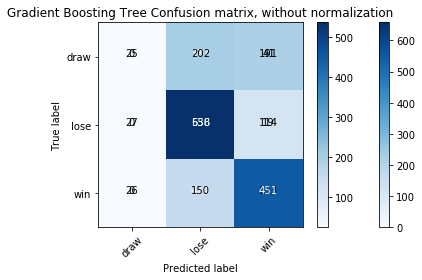

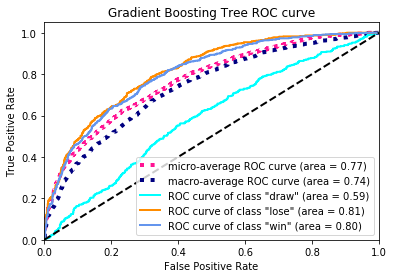

      Iter       Train Loss   Remaining Time 
         1        5401.9820            0.98s
         2        5237.3772            0.96s
         3        5104.2220            0.95s
         4        4994.3829            0.94s
         5        4903.8646            0.94s
         6        4829.1953            0.93s
         7        4766.4984            0.92s
         8        4713.4987            0.91s
         9        4668.1456            0.90s
        10        4630.3470            0.89s
        20        4441.3411            0.83s
        30        4362.1009            0.69s
        40        4307.4543            0.58s
        50        4260.5098            0.46s
        60        4220.1824            0.36s
        70        4182.6940            0.27s
        80        4146.2636            0.18s
        90        4111.3132            0.09s
       100        4072.8064            0.00s
      Iter       Train Loss   Remaining Time 
         1        5400.3805            0.99s
        

        20        4379.0076            0.78s
        30        4292.1536            0.66s
        40        4235.0195            0.55s
        50        4186.2841            0.45s
        60        4148.2349            0.35s
        70        4108.9324            0.26s
        80        4070.2059            0.17s
        90        4030.5354            0.09s
       100        3993.9955            0.00s
('10-fold cross validation mean square error: ', 0.58148219302406179)


In [22]:
#GBT
# Fit GradientBoosting Tree with GridSearch CV:
GBT = GradientBoostingClassifier(random_state=0, verbose = True)
grid_GBT = [{'max_depth': [3,5,7], 'n_estimators': [100,1000,2000]}]
clf_GBT = GridSearchCV(estimator=GBT,param_grid = grid_GBT,scoring='f1_micro',
                   cv = 3,n_jobs=1,verbose=True)

# Fit cross-validation and report result
modelCV_GBT = MyReport(model = clf_GBT, model_Name = 'Gradient Boosting Tree', list_data = list_data,tune = True)


## Using the Neural Net


This section allows us to use the model based on the following inputs:

* Team1 and Team2
* Avg Bet for the teams (win1, draw, win2) based on (http://www.oddsportal.com/soccer/world/world-cup-2018/)
    
    

In [8]:
def processInput (input_array):
    #inputs
    team_1 = input_array[0]
    team_2 = input_array[1]
    avg_odds_win_1 = input_array[2] 
    avg_odds_draw = input_array[3] 
    avg_odds_win_2 = input_array[4]
    print(team_1)
    if any(a is None for a in [team_1,team_2, avg_odds_win_1,avg_odds_draw, avg_odds_win_2]):
        print ("Some inputs are empty. Please enter valid inputs.")
        return

    df1 = data_full[(data_full.home_team == team_1) & (data_full.away_team == team_2)]
    df2 = data_full[(data_full.home_team == team_2) & (data_full.away_team == team_1)]
    df3 = df1.append(df2).sort_values(by=['date'])
    df3['winner'] = np.where(df3.home_score > df3.away_score, df3.home_team, 
                                     np.where(df3.home_score < df3.away_score, df3.away_team, 'None'))
    df3.head()

    # define our own dataframe
    col_names = ['home_team', 'h_win_diff', 'h_draw', 'f_goalF_1', 
                 'f_goalF_2','f_goalA_1','f_goalA_2', 'f_win_1', 'f_win_2', 'f_draw_1', 'f_draw_2','avg_odds_win_1', 'avg_odds_draw', 'avg_odds_win_2']
    my_df = pd.DataFrame(columns = col_names)

    # Test history match stat    
    if len(df3) != 0:
        curr_match = df3.iloc[-1,:]
        df_match = df3[df3['date'] < curr_match['date'] ]
        count = Counter(df_match['winner']) #Now we get no.win and no.draw

        pre_df = curr_match[['id','date','tournament']].copy()

        #     	id	date	team_1	team_2	home_team	tournament	h_win_diff	h_draw	f_goalF_1	f_goalF_2	f_goalA_1	f_goalA_2	f_win_1	f_win_2	f_draw_1	f_draw_2	result
        # Get the head-to-head result
        pre_df['team_1'] =  curr_match['home_team'] if curr_match['home_team'] < curr_match['away_team'] else curr_match['away_team'] 
        pre_df['team_2'] =  curr_match['away_team'] if curr_match['home_team'] < curr_match['away_team'] else curr_match['home_team'] 
        pre_df['home_team'] = curr_match['home_team']

        pre_df['h_win_diff'] = count[pre_df['team_1']] - count[pre_df['team_2']]
        pre_df['h_draw'] = count['None']
    else:
        initial_data = {'home_team':team_1,'team_1':team_1,'team_2':team_2,'h_win_diff':0,'h_draw':0}
        pre_df = pd.Series(initial_data)
        
    # Get the recent result of each team
    # Team 1
    df_10  = data_full[(data_full.home_team == team_1) | (data_full.away_team == team_1)]

    length = df_10.shape[0]
    df_10  = df_10.iloc[length-11:length-1,:]

    df_10['winner'] = np.where(df_10.home_score > df_10.away_score, df_10.home_team, 
                                     np.where(df_10.home_score < df_10.away_score, df_10.away_team, 'None'))

    pre_df['f_goalF_1'] = df_10['home_score'].sum()
    pre_df['f_goalA_1'] = df_10['away_score'].sum()

    dict_result_10 = Counter(df_10['winner'])
    pre_df['f_win_1']  = dict_result_10[team_1]
    pre_df['f_draw_1'] = dict_result_10['None']

    # Team 2
    df_10  = data_full[(data_full.home_team == team_2) | (data_full.away_team == team_2)]

    length = df_10.shape[0]
    df_10  = df_10.iloc[length-11:length-1,:]

    df_10['winner'] = np.where(df_10.home_score > df_10.away_score, df_10.home_team, 
                                     np.where(df_10.home_score < df_10.away_score, df_10.away_team, 'None'))

    pre_df['f_goalF_2'] = df_10['home_score'].sum()
    pre_df['f_goalA_2'] = df_10['away_score'].sum()

    dict_result_10 = Counter(df_10['winner'])
    pre_df['f_win_2']  = dict_result_10[team_2]
    pre_df['f_draw_2'] = dict_result_10['None']
    pre_df['avg_odds_win_1'] = avg_odds_win_1
    pre_df['avg_odds_draw'] = avg_odds_draw
    pre_df['avg_odds_win_2'] = avg_odds_win_2
    
    #encode
    #le_tournament = loadLabelEncoder('LE/tournament.npy')
    #pre_df['tournament'] = le_tournament.transform([pre_df['tournament']])[0]

    # Add HOME team
    same_ht = pre_df.team_1 == pre_df.home_team
    if same_ht:
        pre_df.loc['home_team'] = 1
    else:
        pre_df.loc['home_team'] = 0
    
    my_df = my_df.append(pre_df[col_names],ignore_index=True)

    return my_df


## Inputs para os próximos jogos

Nesta seção, vamos entrar com os dados para os próximos jogos e verificar os resultados.


In [23]:
#Inputs

le_result = loadLabelEncoder('LE/result.npy')

inputs = [["Poland","Colombia", 3.49, 3.47, 2.21],
          ["Saudi Arabia","Egypt", 4.61,3.53,1.89],
          ["Uruguay","Russia", 2.62,3.07,3.09],
          ["Iran","Portugal",6.08,3.68,1.68],
          ["Spain","Morocco",1.35,5.03,10.59],
          ["Australia","Peru",3.05,3.35,2.47],
          ["Denmark","France",4.55,2.64,2.30],
          ["Iceland","Croatia",3.50,3.39,2.20],
          ["Nigeria","Argentina",6.61,4.38,1.54],
          ["Mexico","Sweden",2.42,3.30,3.17],
          ["South Korea","Germany",15.76,7.60,1.19],
          ["Serbia","Brazil",7.76,4.39,1.50],
          ["Switzerland","Costa Rica",1.78,3.29,5.91],
          ["Japan","Poland",2.71,3.28,2.71],
          ["Senegal","Colombia",3.86,3.38,2.05],
          ["England","Belgium",2.88,3.14,2.67],
          ["Panama","Tunisia",4.52,3.66,1.83]          
         ]
results = []

for i in inputs:
    
    data_fit = processInput(i)
    result = modelCV_GBT.predict(data_fit)
    results.append(result)

print(le_result.inverse_transform(results))



Poland
Saudi Arabia
Uruguay
Iran
Spain
Australia
Denmark
Iceland
Nigeria
Mexico
South Korea
Serbia
Switzerland
Japan
Senegal
England
Panama
[[u'lose']
 [u'lose']
 [u'lose']
 [u'lose']
 [u'lose']
 [u'lose']
 [u'lose']
 [u'lose']
 [u'lose']
 [u'lose']
 [u'lose']
 [u'lose']
 [u'lose']
 [u'lose']
 [u'lose']
 [u'lose']
 [u'lose']]


In [20]:
x_train[['avg_odds_win_1','avg_odds_draw','avg_odds_win_2']].max()












avg_odds_win_1    10.168457
avg_odds_draw     12.566578
avg_odds_win_2    17.490989
dtype: float64

In [24]:
# Save the best model
filename = 'save_model/NN.sav'
pickle.dump(modelCV_NN, open(filename, 'wb'))

# Save the best model
filename = 'save_model/GBT.sav'
pickle.dump(modelCV_GBT, open(filename, 'wb'))
